
<a href="https://colab.research.google.com/github/lmanov1/CancerPrediction/blob/main/DataAnalysis.ipynb" target="_blank">         
<img src="https://colab.research.google.com/assets/colab-badge.svg" target="_blank">
</a>

# 1. Data Preparation
Let's see what may be done to prepare our dataset for the modelling

In [46]:
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import pandas as pd
# TBD - download from ftp do not keep in git
if not os.path.exists("./Cancer_Data.csv"): 
    import urllib.request
    url = "https://raw.githubusercontent.com/lmanov1/CancerPrediction/main/Cancer_Data.csv"
    filename = "./Cancer_Data.csv"
    urllib.request.urlretrieve(url, filename)

df = pd.read_csv("./Cancer_Data.csv")
#df = pd.read_csv("https://raw.githubusercontent.com/lmanov1/CancerPrediction/main/Cancer_Data.csv")


## Uniting tables
* We have a single dataset file - so its nothing to unite      

Lets print some basic information about the dataset    

In [47]:

display(df.head())
display(df.info())



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

Dataset has 33 columns and 569 rows , one object feature , 31 float64 and single int64 feature   
Let's see how many distinct values there are in each column

In [48]:
print(df.nunique())

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

## Reduce categories
Dataset has single object column called 'diagnosis' , and no more categorial or object features except this one      
This field have only 2 unique values ['B', 'M']  - it can be treated as categorial and this is a candidate to be a target    
As there is not large categories - there is no need to reduce'em   


## Clean text
Except for the category feature 'diagnosis' , rest of features are numerical :float64 or int64   
So there is no need to group categories , clean text, remove stop words and so on     
  

## Transform/manipulate data
There is no work left to convert other data types to the numeric , strings so on  
Here, we can see that the 'id' column never repeat itself , all its values are unique. So it will not be usefull for predictions.     
There is also a column called "Unnamed: 32" - which does not contain data at all     
So we can drop both columns , and dataset will now have only 31 columns   

In [49]:
df = df.drop('id', axis=1)
df = df.drop('Unnamed: 32', axis=1)


In [50]:
display(df.shape)
display(df.head(2))

(569, 31)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


# Now let's create a flat file on which we will continue working in the next stages 


In [51]:
df.to_pickle("Flat_Cancer_Data.pkl")
df.to_csv("Flat_Cancer_Data.csv")   

# Data Protocol

In [52]:
# Type of valaues 
df.dtypes.to_excel("Cancer_Data_dtypes.xlsx",
             sheet_name='data_type')
# Maximum valaues 
df.max().to_excel("max_Cancer_Data.xlsx",
             sheet_name='max')
# Minimum Values
df.min().to_excel("min_Cancer_Data.xlsx",
             sheet_name='min')
# Missing Values
df.isnull().sum(axis=0).to_excel("NA_Cancer_Data.xlsx",
             sheet_name='NA')
# exporting results to the protocol
df.nunique().to_excel("unique_Cancer_Data.xlsx",
             sheet_name='unique')

# Descriptive Statistics

## Automated reports

In [53]:

from autoviz.AutoViz_Class import AutoViz_Class 
from autoviz import FixDQ
%matplotlib inline

# AV = AutoViz_Class()
# #AV.AutoViz('Cancer_Data.csv')
# fixdq = FixDQ()
# dfAutoViz = fixdq.fit_transform(df)
# AV.AutoViz(dfAutoViz,verbose=2)

# EDA - Explenatory Data Analysis

# Target Value
## Categorial 2 classes
This is the only categorial feature in the dataset, all the rest are numbers

<Axes: xlabel='diagnosis', ylabel='count'>

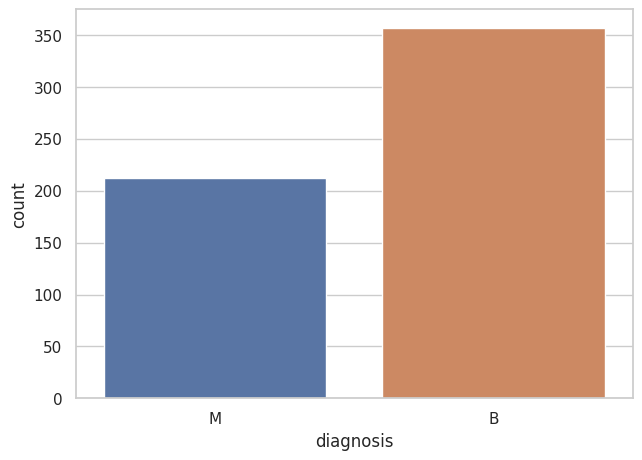

In [54]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.countplot(x='diagnosis', data=df,hue= 'diagnosis')

# Histograms for continuous numbers

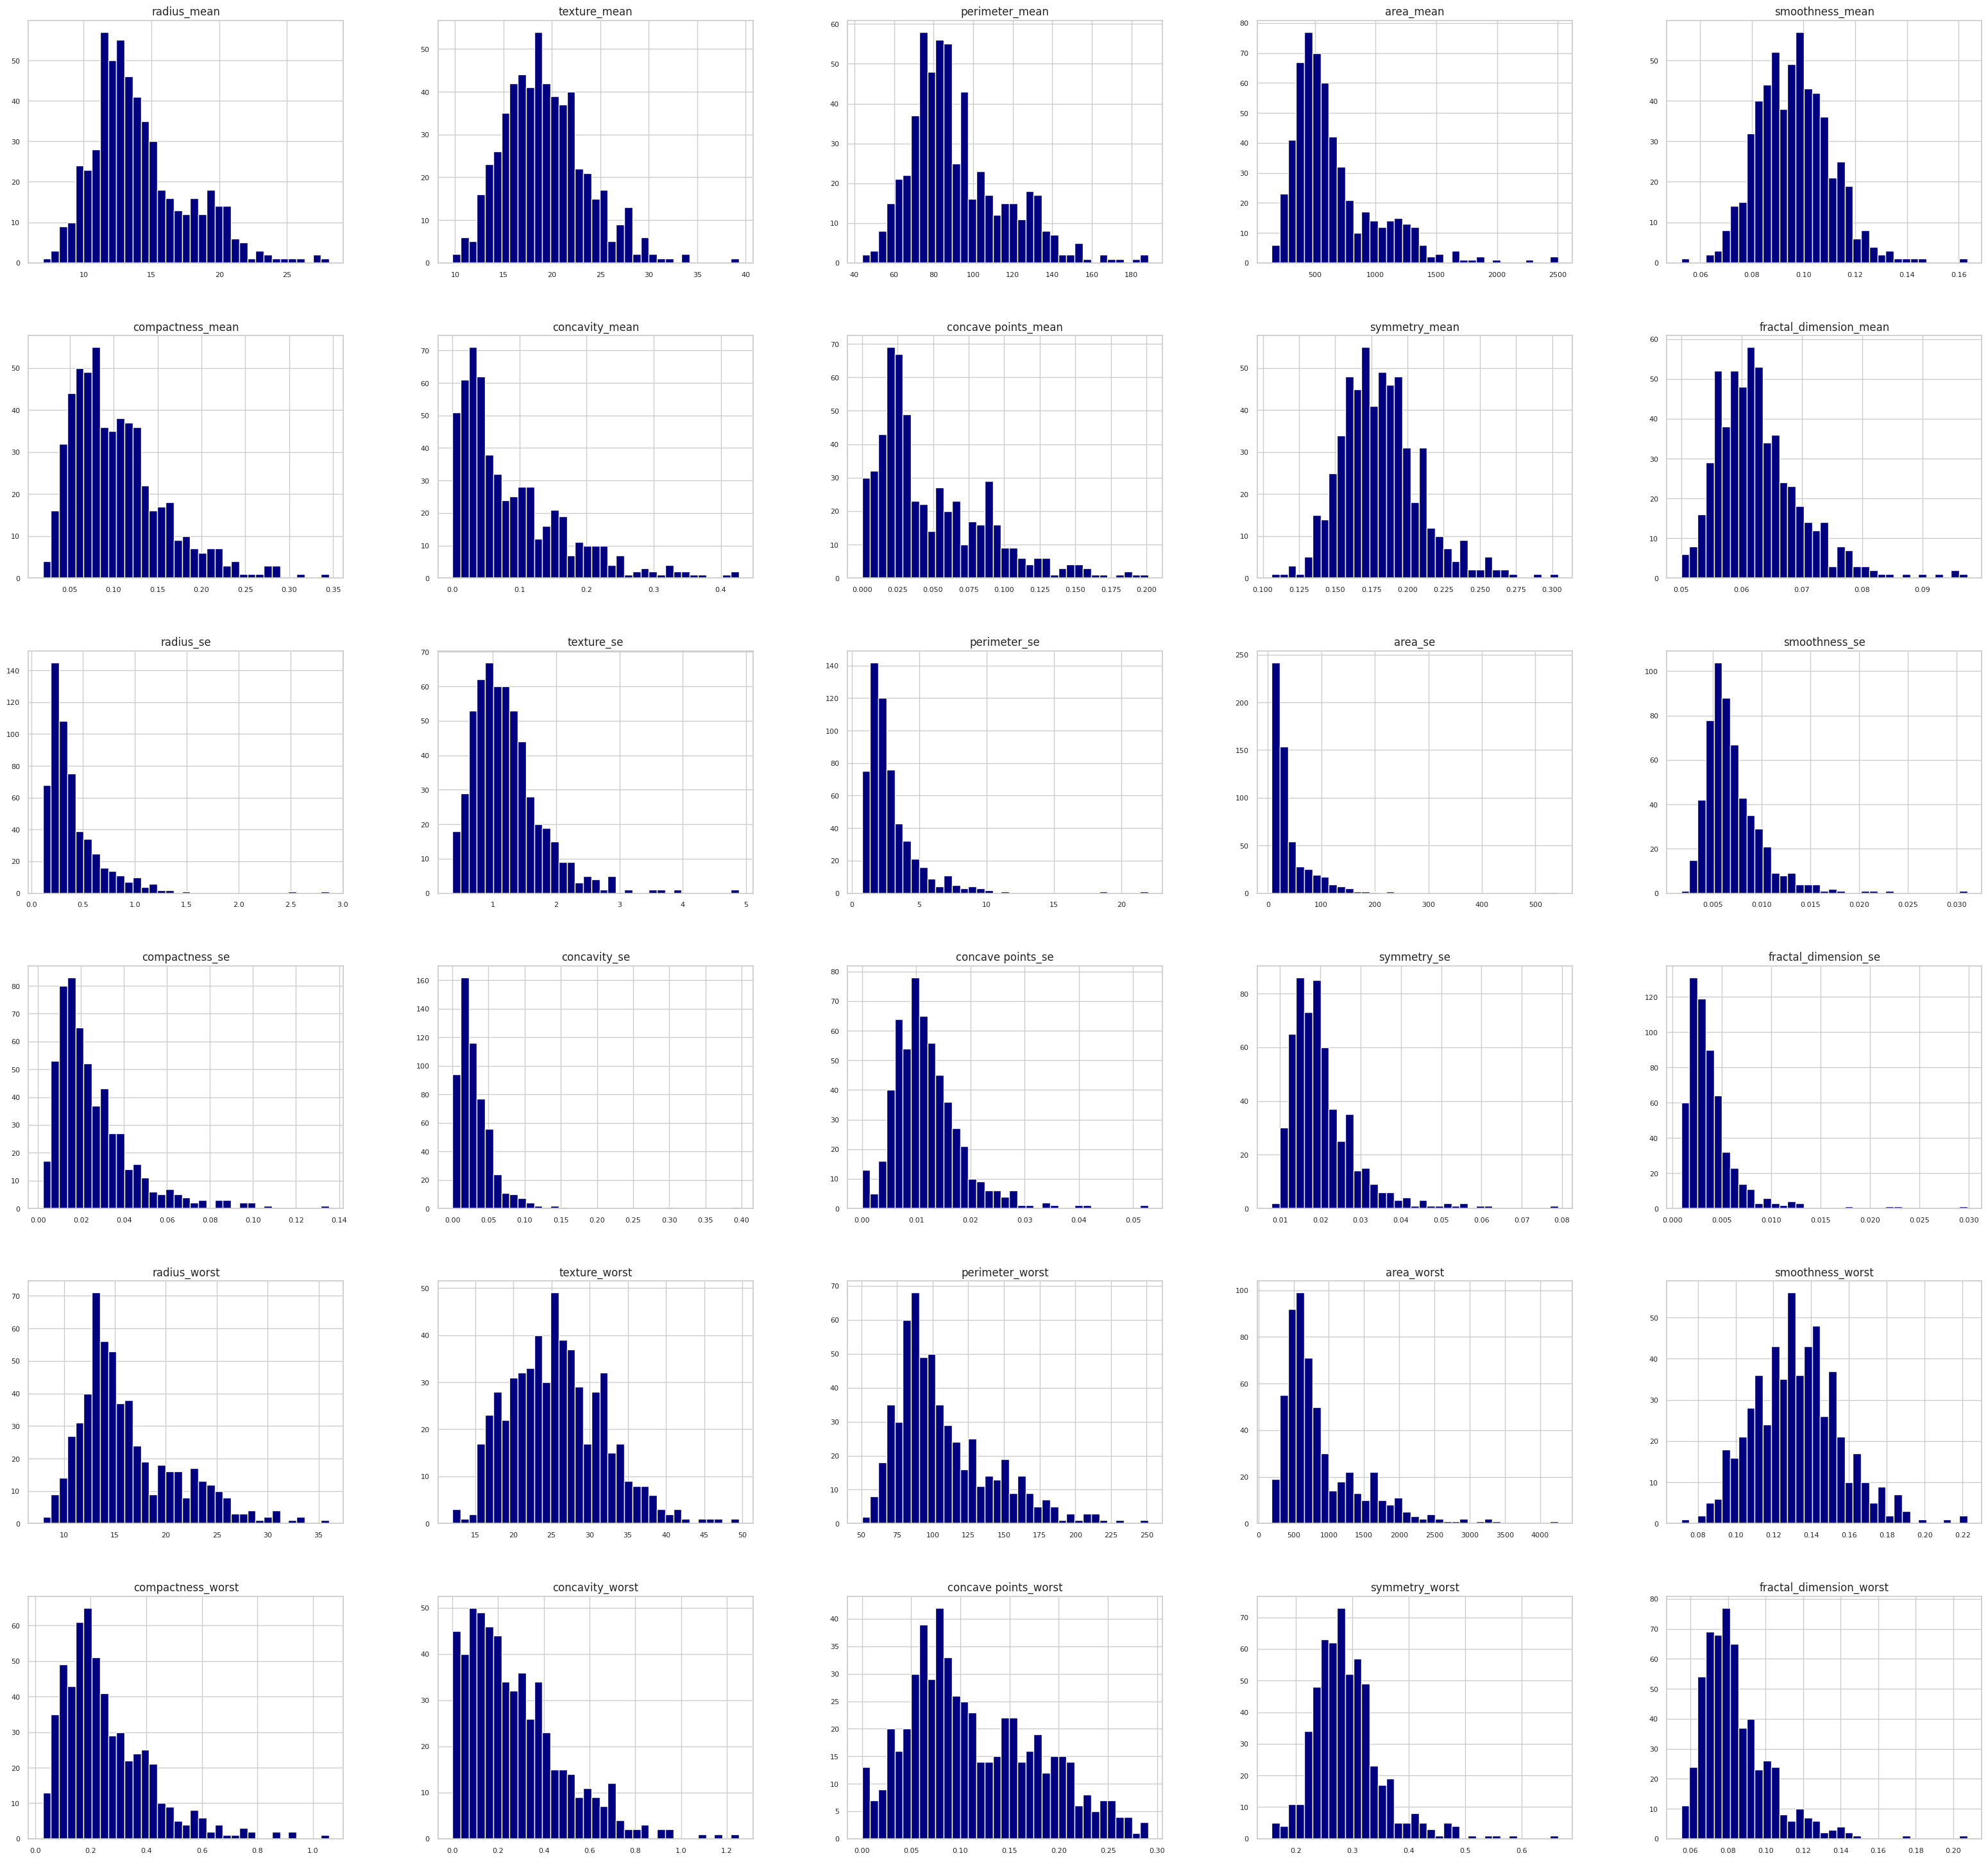

In [55]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
con_df = df[numeric_cols]
con_df.hist(figsize=(35, 35), bins=35, xlabelsize=8, ylabelsize=8, color = "navy");

# Skewness

In [56]:
import pandas as pd
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    else:
       return default  
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
area_se,5.447186
concavity_se,5.110463
fractal_dimension_se,3.923969
perimeter_se,3.443615
radius_se,3.088612
smoothness_se,2.314450
symmetry_se,2.195133
compactness_se,1.902221
area_worst,1.859373
fractal_dimension_worst,1.662579


# Most continus data are normaly distributed?

The answer is no - probably need to normalize

# Correlation 

In [57]:

#con_df.corr()
correlation = con_df[['radius_mean', 'perimeter_mean','area_mean']].corr()
print(correlation)

                radius_mean  perimeter_mean  area_mean
radius_mean      1.000000       0.997855     0.987357 
perimeter_mean   0.997855       1.000000     0.986507 
area_mean        0.987357       0.986507     1.000000 


In [58]:
correlation = con_df[['radius_se','perimeter_se', 'area_se']].corr()
print(correlation)

              radius_se  perimeter_se   area_se
radius_se     1.000000     0.972794    0.951830
perimeter_se  0.972794     1.000000    0.937655
area_se       0.951830     0.937655    1.000000


In [59]:
correlation = con_df[['perimeter_worst', 'area_worst','radius_worst']].corr()
print(correlation)

                 perimeter_worst  area_worst  radius_worst
perimeter_worst     1.000000       0.977578     0.993708  
area_worst          0.977578       1.000000     0.984015  
radius_worst        0.993708       0.984015     1.000000  


(569, 30)

<Axes: >

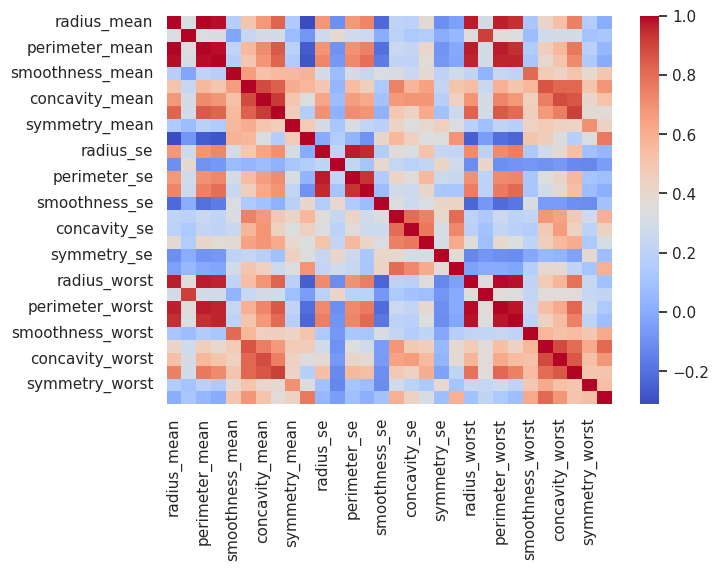

In [60]:
display(con_df.shape)
sb.heatmap(con_df.corr(), cmap='coolwarm')

Some values are hightly correlated  and thus can be dropped

In [61]:
#con_df.corr(method='spearman')

## Visual inspection for different features , by diagnosis

T-statistic:
 [25.43582161 10.86720108 26.40521298 23.93868724  9.14609881 17.69839198
 23.10396343 29.35431859  8.33831179 -0.30571113 16.39635103 -0.1977238
 15.93415802 15.6093429  -1.59936481  7.29707744  6.24615734 10.64249782
 -0.1552978   1.86233046 29.33908156 12.23098135 29.96571739 25.72159026
 11.06674661 17.44537368 20.89717539 31.05455512 10.90230398  8.1513165 ]

P-value:
 [8.46594057e-096 4.05863605e-025 8.43625104e-101 4.73456431e-088
 1.05185036e-018 3.93826311e-056 9.96655576e-084 7.10115016e-116
 5.73338403e-016 7.59936804e-001 9.73894866e-050 8.43332029e-001
 1.65190518e-047 5.89552139e-046 1.10296609e-001 9.97599465e-013
 8.26017617e-010 3.07230877e-024 8.76641818e-001 6.30735508e-002
 8.48229192e-116 1.07805749e-030 5.77139714e-119 2.82884770e-097
 6.57514363e-026 7.06981635e-055 2.46466396e-072 1.96909971e-124
 2.95112058e-025 2.31643245e-015]


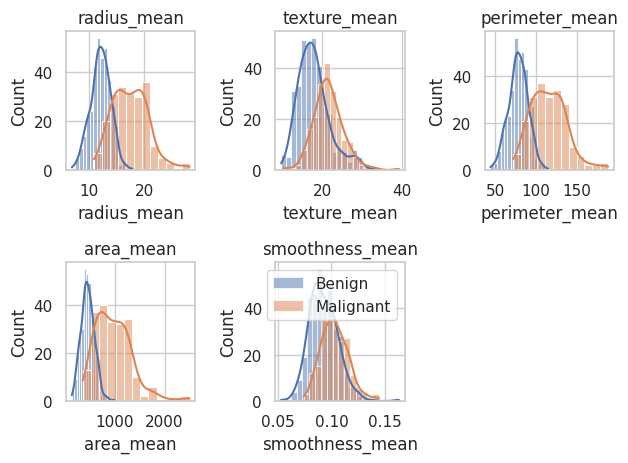

In [62]:
import seaborn as sns
import scipy.stats as stats

# Numerize diagnosis "M" malignant; "B" benign using a dictionary and map function
df2 = df.copy()
diagnosis_coder = {'M':1, 'B':0}
df2.diagnosis = df2.diagnosis.map(diagnosis_coder)
diagnosis = df2.diagnosis

malignant = df2[df2['diagnosis'] == 1].drop('diagnosis', axis=1)
benine = df2[df2['diagnosis'] == 0].drop('diagnosis', axis=1)


# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(malignant, benine)

# Print the results
print(f'T-statistic:\n {t_stat}')
print(f'\nP-value:\n {p_value}')


fig = plt.figure()
# Create 'for loop' to enerate though tumor features and compare with histplot each feature for the both groups
for i,b in enumerate(list(df2.columns[1:6])):   
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1        
    # Create axes object for position i
    ax = fig.add_subplot(2,3,i)    
    # Plot different tumor charateristics using seaborn histplot     
    sns.histplot(benine[b], kde=True, label='Benign', stat='count')    
    sns.histplot(malignant[b], kde=True, label='Malignant',stat='count')   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

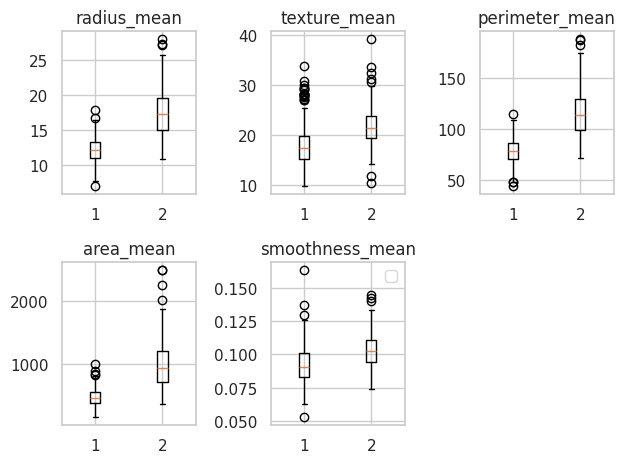

In [63]:
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(df2.columns[1:6])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(2,3,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.boxplot([benine[b], malignant[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()   

##  t-test

In [64]:
import scipy.stats as stats
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(malignant, benine)

# Print the results
print(f'T-statistic:\n {t_stat}')

print(f'\nP-value:\n {p_value}')



T-statistic:
 [25.43582161 10.86720108 26.40521298 23.93868724  9.14609881 17.69839198
 23.10396343 29.35431859  8.33831179 -0.30571113 16.39635103 -0.1977238
 15.93415802 15.6093429  -1.59936481  7.29707744  6.24615734 10.64249782
 -0.1552978   1.86233046 29.33908156 12.23098135 29.96571739 25.72159026
 11.06674661 17.44537368 20.89717539 31.05455512 10.90230398  8.1513165 ]

P-value:
 [8.46594057e-096 4.05863605e-025 8.43625104e-101 4.73456431e-088
 1.05185036e-018 3.93826311e-056 9.96655576e-084 7.10115016e-116
 5.73338403e-016 7.59936804e-001 9.73894866e-050 8.43332029e-001
 1.65190518e-047 5.89552139e-046 1.10296609e-001 9.97599465e-013
 8.26017617e-010 3.07230877e-024 8.76641818e-001 6.30735508e-002
 8.48229192e-116 1.07805749e-030 5.77139714e-119 2.82884770e-097
 6.57514363e-026 7.06981635e-055 2.46466396e-072 1.96909971e-124
 2.95112058e-025 2.31643245e-015]
